In [1]:
import sys


In [2]:
sys.path.append("/home/dalton/environments/Gillespy2/Repository/gillespy2")

In [3]:
sys.path


['',
 '/usr/lib/python35.zip',
 '/usr/lib/python3.5',
 '/usr/lib/python3.5/plat-x86_64-linux-gnu',
 '/usr/lib/python3.5/lib-dynload',
 '/usr/lib/python3.5/site-packages',
 '/usr/local/lib/python3.5/dist-packages',
 '/usr/lib/python3/dist-packages',
 '/usr/lib/python3/dist-packages/IPython/extensions',
 '/home/dalton/.ipython',
 '/home/dalton/environments/Gillespy2/Repository/gillespy2']

In [4]:
%matplotlib
%matplotlib inline
import os
import numpy
import matplotlib.pyplot as plt

Using matplotlib backend: TkAgg


In [5]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='A', initial_value=301)
            B = gillespy2.Species(name='B', initial_value=120)
            C = gillespy2.Species(name='C', initial_value=0)
            D = gillespy2.Species(name='D', initial_value=0)
            self.add_species([A, B, C, D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [6]:
import pyximport
from optimized_ssa_solver import SSASolver

In [7]:
model = MichaelisMenten()

[   0.    2.   11.   12.   16.   22.   24.   32.   34.   37.   41.   45.
   51.   54.   54.   56.   62.   63.   67.   72.   81.   83.   85.   87.
   95.   99.  101.  108.  109.  113.  117.  121.  124.  127.  129.  134.
  134.  137.  140.  146.  149.  153.  155.  158.  159.  163.  170.  172.
  173.  179.  183.  184.  187.  191.  192.  197.  198.  200.  202.  205.
  207.  209.  212.  213.  214.  217.  218.  220.  220.  222.  223.  224.
  226.  228.  230.  232.  232.  235.  237.  238.  239.  240.  241.  242.
  242.  243.  244.  246.  248.  249.  251.  252.  253.  253.  254.  254.
  255.  255.  256.  257.  257.]


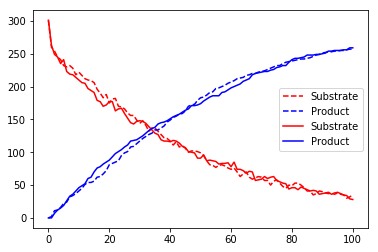

In [8]:
results = model.run(show_labels=False)
dresults = model.run(solver=SSASolver, show_labels=False)
print(dresults[0][:,4])
plt.plot(dresults[0][:,0],dresults[0][:,1],'--r', label='Substrate')
plt.plot(dresults[0][:,0],dresults[0][:,4],'--b', label='Product')
plt.plot(results[0][:,0],results[0][:,1],'-r', label='Substrate')
plt.plot(results[0][:,0],results[0][:,4],'-b', label='Product')
plt.plot([0],[11])
plt.legend(loc='best')

In [ ]:
n_trajectories = 10
%timeit -n20 results = model.run(show_labels=False, number_of_trajectories=n_trajectories)
SSASolver.use_cython = True
%timeit -n20 dresults = model.run(solver=SSASolver, show_labels=False,number_of_trajectories=n_trajectories)
SSASolver.use_cython = False
%timeit -n20 dresults = model.run(solver=SSASolver, show_labels=False,number_of_trajectories=n_trajectories)